In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset=pd.read_csv("C:/Users/Victus/Downloads/archive (6)/diabetes.csv")

In [5]:
dataset.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

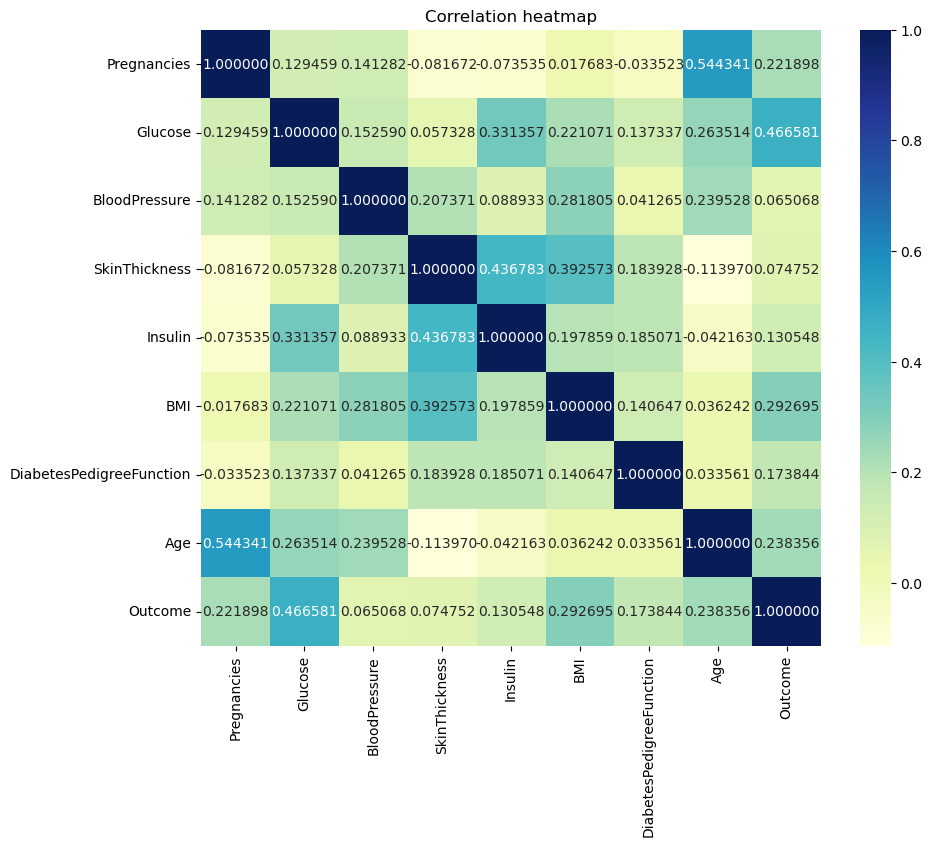

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True,fmt="1f",cmap="YlGnBu")
plt.title("Correlation heatmap")

C:\Users\Victus\AppData\Local\Temp\ipykernel_158252\1345644690.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1],color='Red',shade=True)
C:\Users\Victus\AppData\Local\Temp\ipykernel_158252\1345644690.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0],color='Blue',shade=True)


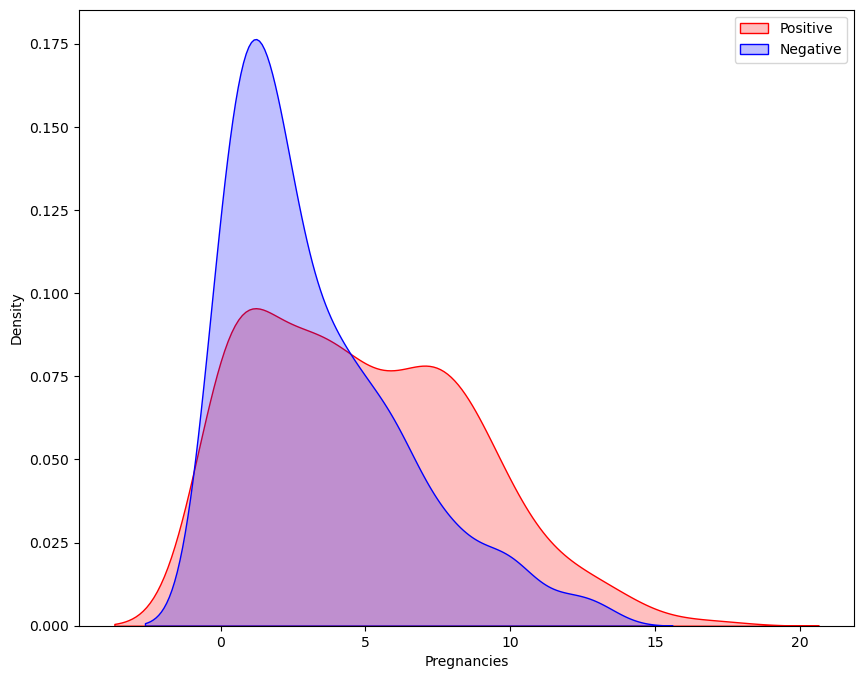

In [16]:
plt.figure(figsize=(10,8))
kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==1],color='Red',shade=True)
kde=sns.kdeplot(dataset["Pregnancies"][dataset["Outcome"]==0],color='Blue',shade=True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Density")
kde.legend(["Positive","Negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

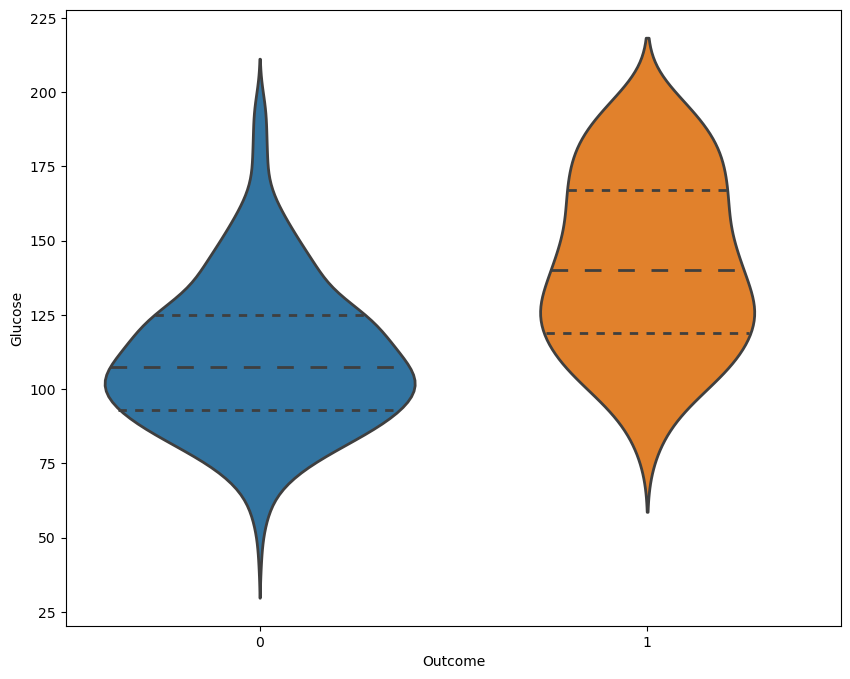

In [15]:
plt.figure(figsize=(10,8))
sns.violinplot(data=dataset,x='Outcome',y='Glucose',split=True,linewidth=2,inner='quart')

In [18]:
dataset['Glucose']=dataset['Glucose'].replace(0,dataset['Glucose'].median())
dataset['BloodPressure']=dataset['BloodPressure'].replace(0,dataset['BloodPressure'].median())
dataset['BMI']=dataset['BMI'].replace(0,dataset['BMI'].mean())
dataset['SkinThickness']=dataset['SkinThickness'].replace(0,dataset['SkinThickness'].mean())
dataset['Insulin']=dataset['BMI'].replace(0,dataset['BMI'].mean())


In [19]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,33.6,33.6,0.627,50,1
1,1,85,66,29.000000,26.6,26.6,0.351,31,0
2,8,183,64,20.536458,23.3,23.3,0.672,32,1
3,1,89,66,23.000000,28.1,28.1,0.167,21,0
4,0,137,40,35.000000,43.1,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,32.9,32.9,0.171,63,0
764,2,122,70,27.000000,36.8,36.8,0.340,27,0
765,5,121,72,23.000000,26.2,26.2,0.245,30,0
766,1,126,60,20.536458,30.1,30.1,0.349,47,1


In [21]:
x=dataset.drop(['Outcome'],axis=1)
y=dataset['Outcome']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
training_accuracy=[]
test_accuracy=[]
for n_neighbors in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)

In [26]:
training_accuracy.append(knn.score(x_train,y_train))
training_accuracy.append(knn.score(x_test,y_test))

ValueError: x and y must have same first dimension, but have shapes (10,) and (2,)

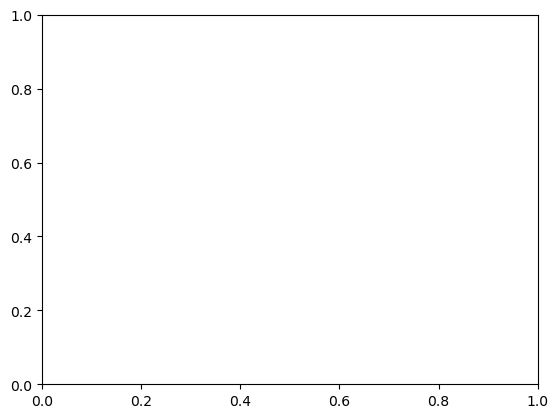

In [27]:
plt.plot(range(1,11),training_accuracy,label='training_accuracy')
plt.plot(range(1,11),test_accuracy,label='test_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()


In [29]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train),": Training Accuracy")
print(knn.score(x_test,y_test),": Testing Accuracy")


0.8132295719844358 : Training Accuracy
0.7362204724409449 : Testing Accuracy


In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train),": Training Accuracy")
print(dt.score(x_test,y_test),": Testing Accuracy")


1.0 : Training Accuracy
0.7125984251968503 : Testing Accuracy


In [32]:
dt1=DecisionTreeClassifier(random_state=0,max_depth=3)
dt1.fit(x_train,y_train)
print(dt1.score(x_train,y_train),": Training Accuracy")
print(dt1.score(x_test,y_test),": Testing Accuracy")


0.77431906614786 : Training Accuracy
0.6929133858267716 : Testing Accuracy


In [33]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(random_state=42)
mlp.fit(x_train,y_train)
print(mlp.score(x_train,y_train),": Training Accuracy")
print(mlp.score(x_test,y_test),": Testing Accuracy")


0.7373540856031129 : Training Accuracy
0.7047244094488189 : Testing Accuracy


In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [35]:
mlp1=MLPClassifier(random_state=0)
mlp1.fit(x_train_scaled,y_train)
print(mlp1.score(x_train_scaled,y_train),": Training Accuracy")
print(mlp1.score(x_test_scaled,y_test),": Testing Accuracy")


0.8249027237354085 : Training Accuracy
0.7480314960629921 : Testing Accuracy


C:\Users\Victus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
